## Lab #2 Assignment
## QMSS S5019 - Data Analysis with Python
## Lovina Putri
## CUID: lap2236

***(1) Set-up packages and code***

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

***(2) Import data***

In [ ]:
url = 'https://www.qogdata.pol.gu.se/data/qog_bas_cs_jan25.xlsx'
df = pd.read_excel(url)

***(3) Data check***

In [ ]:
df.head()

,cname_qog,cname,ccode_qog,ccodecow,ccodealp,ccode,ajr_settmort,atop_ally,atop_number,bci_bci,...,wvs_imprel,wvs_pmi12,wvs_psarmy,wvs_psdem,wvs_psexp,wvs_pssl,wvs_relacc,wvs_satfin,wvs_subh,wvs_trust
0,Afghanistan,Afghanistan,4,700.0,AFG,4.0,4.540098,1.0,1.0,70.507206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Albania,8,339.0,ALB,8.0,NaN,1.0,8.0,56.955081,...,2.869328,NaN,1.596485,3.849031,3.475513,1.744196,NaN,NaN,3.488758,0.027857
2,Algeria,Algeria,12,615.0,DZA,12.0,4.359270,1.0,9.0,49.363506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,Andorra,20,232.0,AND,20.0,NaN,1.0,2.0,14.475297,...,2.034930,2.710394,1.336049,3.681363,2.635721,1.830491,1.751004,6.561316,4.089641,0.255744
4,Angola,Angola,24,540.0,AGO,24.0,5.634789,1.0,8.0,62.067964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Question 1***

1-- Recode 2 different variables into new categories. They can both be continuous-ish or both be nominal-ish, or one of each. Tell me what you did and explain the variable(s).

**Answer 1:**

For this question, I choose the **Fixed broadband subscriptions (per 100 people) (wdi_broadb)**.

Data description: Fixed broadband subscriptions refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or greater than, 256 kbit/s. This includes cable modem, DSL, fiber-to-the-home/building, other fixed (wired)-broadband subscriptions, satellite broadband and terrestrial fixed wireless broadband. This total is measured irrespective of the method of payment. It excludes subscriptions that have access to data communications (including the Internet) via mobile-cellular networks. It should include fixed WiMAX and any other fixed wireless technologies. It includes both residential subscriptions and subscriptions for organizations.

I will categorized the variable into 4 levels:
> Very Low Broadb. Access: wdi_broadb <= 10, \
Low Broadb. Access: wdi_broadb >10 and <= 20, \
Moderate Broadb. Access: wdi_broadb >20 and <= 30,  
High Broadb. Access: wdi_broadb > 30

In [ ]:
# Recode any variable based on specific conditions, ensuring that missings stay missings after recoding
conditions = [
    (df['wdi_broadb'] <= 10) ,
    (df['wdi_broadb'] > 10 ) & (df['wdi_broadb'] <=20),
    (df['wdi_broadb'] > 20) & (df['wdi_broadb'] <=30),
    (df['wdi_broadb'] > 30  ) ]
choices = ["Very Low Broadb.", "Low Broadb.", "Moderate Broadb.", "High Broadb."]
df['bb_level'] = np.select(conditions, choices, default='nan')

In [ ]:
# Ensuring missing values are treated as NaN missings
df['bb_level'] = df['bb_level'].replace('nan', np.nan)

In [ ]:
# View the output, including missings
df.bb_level.value_counts(dropna=False)

,count
bb_level,
Very Low Broadb.,93
High Broadb.,45
Low Broadb.,28
Moderate Broadb.,25
NaN,3


In [ ]:
# Check whether original variable is recoded properly
pd.crosstab(df['wdi_broadb'], df['bb_level'])

bb_level,High Broadb.,Low Broadb.,Moderate Broadb.,Very Low Broadb.
wdi_broadb,,,,
0.000000,0,0,0,1
0.001841,0,0,0,1
0.002273,0,0,0,1
0.007294,0,0,0,1
0.009761,0,0,0,1
...,...,...,...,...
47.520700,1,0,0,0
47.644200,1,0,0,0
47.943300,1,0,0,0


<Axes: xlabel='bb_level', ylabel='wdi_broadb'>

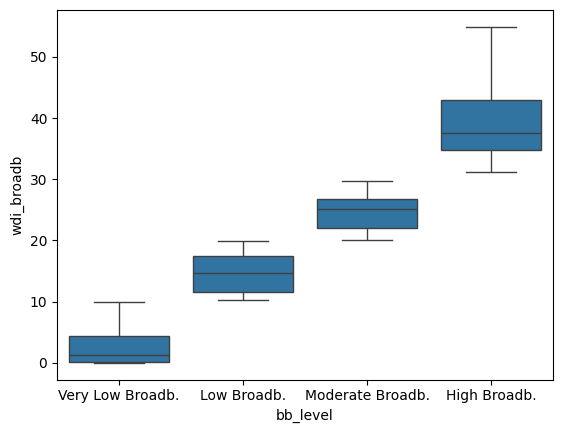

In [ ]:
# Check the distribution of the variables
sns.boxplot(x='bb_level', y='wdi_broadb', data=df, order=["Very Low Broadb.", "Low Broadb.", "Moderate Broadb.", "High Broadb."])

For this first variable, all of the recodes check out.  We were able to create 4 levels, even though the distribution is uneven. There are 93 countries with very low broadband access, 28 countries with low broadband access, 25 countries with moderate broadband access, and 45 countries with high broadband access.

For the second variable I choose the Gini Index (wdi_gini).

Data description: Gini index measures the extent to which the distribution of income (or, in some cases, consumption expenditure) among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality

 The category will be:
> Low Inequality: wdi_gini <= 25, \
Moderately Low Inequality: wdi_gini > 25 and <= 30 \
Moderately High Inequality: wdi_gini > 30 and <= 40 \
High Inequality: wdi_gini > 40 and <= 45 \
Very High Inequality: wdi_gini > 45

Source: [UN (2022) in World Bank (2024)](https://documents.worldbank.org/en/publication/documents-reports/documentdetail/099549506102441825/idu1bd155bac16d78143af188331f87564a9d6c8)

In [ ]:
df['gini_tier'] = pd.cut(df['wdi_gini'],
                   bins=[0, 25, 30, 40, 45, float('inf')],
                   right=True,
                  labels=["Low Ineq.", "Mod. Low Ineq.", "Mod. High Ineq.", "High Ineq.", "Very High Ineq."], ordered=True)

In [ ]:
df.gini_tier.value_counts(sort=False, dropna=False)

,count
gini_tier,
Low Ineq.,3
Mod. Low Ineq.,25
Mod. High Ineq.,64
High Ineq.,16
Very High Ineq.,11
NaN,75


In [ ]:
# Check whether original variable is recoded properly
pd.crosstab(df['wdi_gini'], df['gini_tier'])

gini_tier,Low Ineq.,Mod. Low Ineq.,Mod. High Ineq.,High Ineq.,Very High Ineq.
wdi_gini,,,,,
24.1,1,0,0,0,0
24.3,1,0,0,0,0
24.4,1,0,0,0,0
25.6,0,1,0,0,0
25.7,0,2,0,0,0
...,...,...,...,...,...
50.9,0,0,0,0,1
51.3,0,0,0,0,1
51.5,0,0,0,0,1


<Axes: xlabel='gini_tier', ylabel='wdi_gini'>

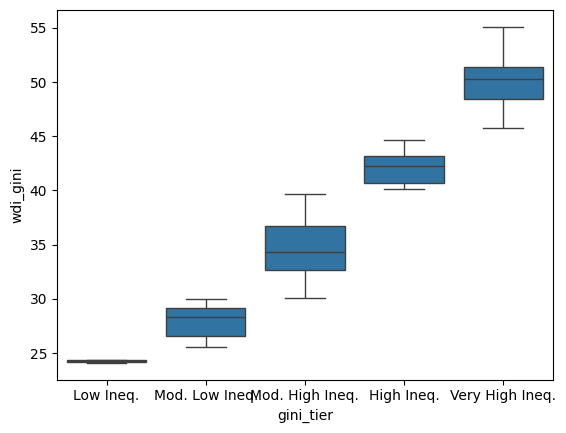

In [ ]:
# Check the distribution of the variables
sns.boxplot(x='gini_tier', y='wdi_gini', data=df, order=["Low Ineq.", "Mod. Low Ineq.", "Mod. High Ineq.", "High Ineq.", "Very High Ineq."])

We can see that the second variable also have all recoded variables check out and the distribution is still uneven.

***Question 2*** \
2-- Use one (or both) of your recoded variables to do a cross-tabulation. Explain your results.

**Answer 2:** \
I will use my 2 recoded variables in my cross-tabulation which are access to electricity and Gini index (wdi_broadb and wdi_gini).  I expect these two variables to be related together to a degree.

In [ ]:
# Cross-tabulate two variables
pd.crosstab(df.bb_level, df.gini_tier, normalize='columns')*100

gini_tier,Low Ineq.,Mod. Low Ineq.,Mod. High Ineq.,High Ineq.,Very High Ineq.
bb_level,,,,,
High Broadb.,100.0,36.0,34.3750,6.25,0.000000
Low Broadb.,0.0,20.0,12.5000,25.00,36.363636
Moderate Broadb.,0.0,12.0,14.0625,18.75,18.181818
Very Low Broadb.,0.0,32.0,39.0625,50.00,45.454545


<Axes: xlabel='gini_tier'>

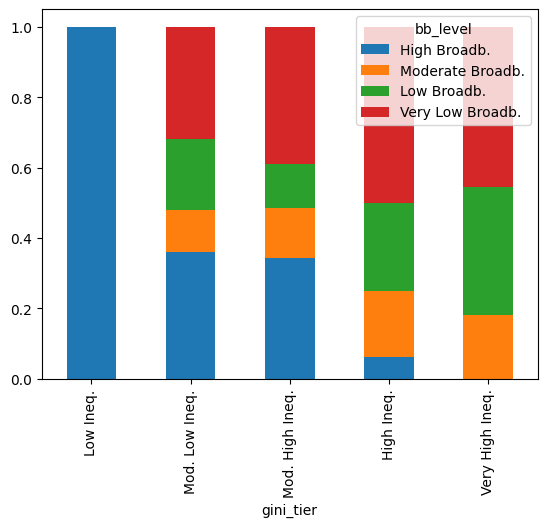

In [ ]:
# Graph these cross-tabulated variables via a stacked bar chart

# Define the variable names
variables = ['gini_tier', 'bb_level']

# Group by the variables and count the occurrences
group_counts = df.groupby(variables).size()

# Group by the first variable only and count the occurrences
total_counts = df.groupby(variables[0]).size()

# Calculate the percentage
percentages = group_counts / total_counts

# Order the data by gini_tier before unstacking and plotting
ordered_percentages = percentages.unstack().loc[["Low Ineq.", "Mod. Low Ineq.", "Mod. High Ineq.", "High Ineq.", "Very High Ineq." ]]

# Order the columns (bb_level categories)
ordered_percentages = ordered_percentages[["High Broadb.", "Moderate Broadb.", "Low Broadb.", "Very Low Broadb."]]

# Unstack and plot the data
ordered_percentages.plot(kind='bar', stacked=True)

The cross-tabulation clearly shows a correlation where countries with lower Gini coefficient (indicated by high and very high inequality categories) will mostly have very low to low broadband subscriptions, with the broadband subscriptions increasing as income inequality decreases. Country with higher Gini coefficient (indicated by moderate low and low inequality) exhibit higher broadband subscription, reflecting wider adoption of the broadband services as telecommunication infrastructure. We can observe in the stacked bar chart, where the blue bar of high broadband subscription just gets bigger and bigger as we move to countries with low inequality.

***Question 3*** \
3 -- Run a correlation of one variable with another variable; make all of the recodes necessary to make the correlation as easy to interpret as possible; and explain your results.

**Answer 3:** \
I will investigate the correlation between the Global Competitiveness Index (GCI) and New Business Density (new registrations per 1,000 people ages 15-64). In this context, the Global Competitiveness Index 4.0 assesses the microeconomic and macroeconomic foundations of national competitiveness, which is defined as the set of institutions, policies, and factors that determine the level of productivity of a country. I expect that countries with higher competitiveness tend to have higher new business in a period.

In [ ]:
# calculate the Pearson correlation
df['wef_gci'].corr(df['wdi_busden'])

np.float64(0.47946786508784117)

The correlation between Global Competitiveness Index and New Business Density is approximately 0.479. This does suggest that country with higher competitiveness which measured by the micro and macroeconomic foundations, institutions, policies, and productivity factor tend to have higher new business.

***Question 4*** \
4 -- Identify the most extreme cases on some variable.  Interpret the results.

**Answer 4:** \
Below are the countries with the highest and the lowest Global Competitiveness Index:

In [ ]:
# The 5 highest values on this variable, along with the name of the country
df[['cname', 'wef_gci']].dropna().sort_values(by='wef_gci', ascending=False).head(5)

,cname,wef_gci
154,Singapore,84.783817
185,United States of America (the),83.673316
121,Netherlands (the),82.392170
167,Switzerland,82.325118
85,Japan,82.271218


In [ ]:
# The 5 lowest values on this variable, along with the name of the country
df[['cname', 'wef_gci']].dropna().sort_values(by='wef_gci', ascending=True).head(5)

,cname,wef_gci
34,Chad,35.084571
191,Yemen,35.503114
41,Congo (the Democratic Republic of the),36.139544
72,Haiti,36.344446
116,Mozambique,38.078535


The top five countries based on Global Competitiveness Index are Singapore, USA, Netherlands, Switzerland, and Japan.  These countries have high economic competitiveness, especially in terms of micro and macroeconomic factors, intitutions, policies, and higher productivity.  The bottom five countries are Chad, Yemen, Dem. Rep. of Congo, Haiti, and Mozambique -- which mostly located in Africa, Middle East, and Carribean Sea.

Moreover, below are the countries with the highest and the lowest New Business Density:

In [ ]:
# The 5 highest values on this variable, along with the name of the country
df[['cname', 'wdi_busden']].dropna().sort_values(by='wdi_busden', ascending=False).head(5)

,cname,wdi_busden
56,Estonia,29.416838
31,Cabo Verde,23.005425
101,Luxembourg,22.758816
99,Liechtenstein,20.617764
123,New Zealand,19.447027


In [ ]:
# The 5 highest values on this variable, along with the name of the country
df[['cname', 'wdi_busden']].dropna().sort_values(by='wdi_busden', ascending=True).head(5)

,cname,wdi_busden
66,Kiribati,0.027047
41,Congo (the Democratic Republic of the),0.038276
12,Bangladesh,0.041042
40,Congo (the),0.041575
97,Liberia,0.042907


The top five countries based on the New Business Density are Estonia, Carbo Verde, Luxembourg, Liechtenstein, and New Zealand. This finding is interesting because among all the Top 5 countries which located in the Europe, there is one country located in Africa, Cabo Verde. The new business could be induced by its prominent economic sector such as tourism. Meanwhile, the bottom five countries are Kiribati, Dem. Rep. of Congo, Bangladesh, Congo, and Liberia -- which mostly located in Africa or Asia/Oceania.



---

